## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centers in Helsinki**.

In problem 1 aim is to find out the addresses of shopping centers and to retreive numercal coordinates for these addresses. As an output, we will have a Shapefile called `shopping_centers.shp` which contains the geocoded result.

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
 *Hint for "Tripla": This shopping center opened in October 10 2019, and if you are doing this exercise soon after that, the official address might not yet be in online databases. 
 Check for an address nearby the Pasila railway station on OpenStreetMap.org and use that as input.*

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://automating-gis-processes.github.io/site/master/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [1]:
# Import modules
import requests
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from pyproj import CRS
import geojson

# Read the data (replace "None" with your own code)
data = pd.read_csv("shopping_centers.txt", sep=";")

In [2]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

   id       name                                            addr
0   0       Itis            Itäkatu 1-7, 00930 Helsinki, Finland
1   1      Forum  Mannerheimintie 14–20, 00100 Helsinki, Finland
2   2  Iso-omena           Piispansilta 11, 02230 Espoo, Finland
3   3      Sello       Leppävaarankatu 3-9, 02600 Espoo, Finland
4   4      Jumbo      Vantaanportinkatu 3, 01510 Vantaa, Finland
5   5       REDI   Hermannin rantatie 5, 00580 Helsinki, Finland
6   6     Tripla                         00520 Helsinki, Finland


- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [3]:
# Geocode the addresses using Nominatim
geo = gpd.tools.geocode(data["addr"], provider="nominatim", user_agent="autogis_xx", timeout=4)

In [4]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.93828 60.16878)   
2  POINT (24.73833 60.16129)   
3  POINT (24.81042 60.21752)   
4  POINT (24.96282 60.29245)   
5  POINT (24.97904 60.18702)   
6  POINT (25.01986 60.21942)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  
2  Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...  
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  
5  Silta, 5, Hermannin rantatie, Verkkosaari, Kal...  
6  Viikki, Koillinen suurpiiri, Helsinki, Helsing...  


In [5]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [6]:
# Check the crs of the geocoded result
print(geo.crs)

# Reproject the layer
geo = geo.to_crs(epsg=3879)

EPSG:4326


In [7]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [8]:
# Join the tables
geodata = geo.join(data)

In [9]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485470.196 6672071.413)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                             addr  
0            Itäkatu 1-7, 00930 Helsinki, Finland  
1  Mannerheimintie 14–20, 00100 Helsinki, Finland  
2           Piispansilta 11, 02230 Espoo, Finland  
3       Leppävaarankatu 3-9, 02600 Espoo, Finland  
4      Vantaanportinkatu 3, 01510 Vantaa, Finland  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [10]:
# Define output filepath
out_fp = "shopping_centers.shp"

# Save file
geodata.to_file(out_fp)

In [11]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [12]:
# Create buffer column
geodata["buffer"] = None

- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [13]:
# Claculate buffer
geodata["buffer"] = geodata.buffer(distance=1500)

In [14]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485470.196 6672071.413)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14–20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 3-9, 02600 Espoo, Finland   
4      Vantaanportinkatu 3, 01510 Vantaa, Finland   

                   

In [15]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [16]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [17]:
# Replace geometry values with buffer values
geodata["geometry"] = geodata["buffer"]

In [18]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((25506098.602 6677662.109, 25506091.3...   
1  POLYGON ((25498073.542 6672878.360, 25498066.3...   
2  POLYGON ((25486970.196 6672071.413, 25486962.9...   
3  POLYGON ((25490991.076 6678322.265, 25490983.8...   
4  POLYGON ((25499443.932 6686656.982, 25499436.7...   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                             addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finland   
1  Mannerheimintie 14–20, 00100 Helsinki, Finland   
2           Piispansilta 11, 02230 Espoo, Finland   
3       Leppävaarankatu 

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [19]:
# Select needed columns
geodata = geodata[["id", "name", "geometry"]]
geodata

,id,name,geometry
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3..."
1,1,Forum,"POLYGON ((25498073.542 6672878.360, 25498066.3..."
2,2,Iso-omena,"POLYGON ((25486970.196 6672071.413, 25486962.9..."
3,3,Sello,"POLYGON ((25490991.076 6678322.265, 25490983.8..."
4,4,Jumbo,"POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,5,REDI,"POLYGON ((25500337.156 6674909.983, 25500329.9..."
6,6,Tripla,"POLYGON ((25502600.650 6678519.536, 25502593.4..."


## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://www.hsy.fi/fi/asiantuntijalle/avoindata/Sivut/AvoinData.aspx?dataID=7) as a shapefile (using wget).

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `26532 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [20]:
# Specify the url for web feature service
url = "https://kartta.hsy.fi/geoserver/wfs"

# Specify parameters (read data in json format)
params = dict(
    service="WFS",
    version="2.0.0",
    request="GetFeature",
    typeName="asuminen_ja_maankaytto:Vaestotietoruudukko_2018",
    outputFormat="json"
)

# Fetch data from WFS using requests
resp = requests.get(url, params=params)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(resp.content))

# Change the name of a column
pop = pop.rename(columns={"asukkaita": "pop18"})

# Subset columns
pop = pop[["pop18", "geometry"]]

# Define CRS in case there is none
if not pop.crs:
    pop.crs = CRS.from_epsg(3879).to_wkt()
    
# Reproject geodata to projection of population layer
geodata = geodata.to_crs(pop.crs)

In [21]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 5832
   pop18                                           geometry
0      9  POLYGON ((25472499.995 6689749.005, 25472499.9...
1      5  POLYGON ((25472499.995 6685998.998, 25472499.9...
2      8  POLYGON ((25472499.995 6684249.004, 25472499.9...


In [22]:
# Create a spatial join between grid layer and buffer layer. 
joined = gpd.sjoin(geodata, pop, how="inner", predicate="contains")
joined.head()

,id,name,geometry,index_right,pop18
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5222,149
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",4978,314
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",4916,670
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5161,147
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",5039,374


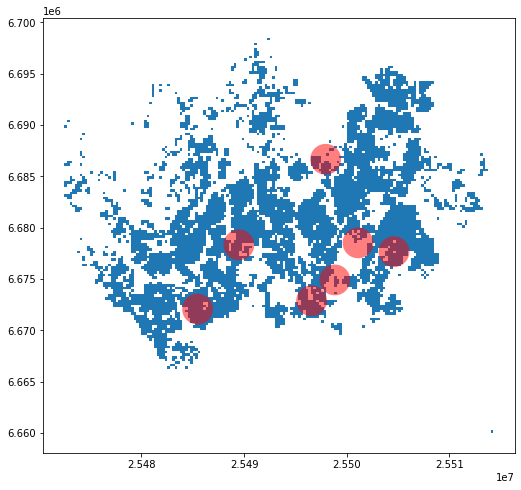

In [23]:
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot population grid
pop.plot(ax=ax)

# Plot buffers
geodata.plot(ax=ax, color="red", alpha=0.5);

In [24]:
# Report how many people live within 1.5 km distance from each shopping center
grouped = joined.groupby("name")

for key, group in grouped:
    total_pop = group["pop18"].sum()
    print(f"{total_pop} people live within 1.5 km from {key}.")

56891 people live within 1.5 km from Forum.
26390 people live within 1.5 km from Iso-omena.
21008 people live within 1.5 km from Itis.
10569 people live within 1.5 km from Jumbo.
24913 people live within 1.5 km from REDI.
20965 people live within 1.5 km from Sello.
4948 people live within 1.5 km from Tripla.


**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

__Responses__
- 3 because it was a little bit challenging, but also allowed for a review of all the concepts from Lesson 3.
- Manipulating the data mostly with Pandas' functionalities.
- Using GeoPandas specific functions and spatial join.

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)